In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [191]:
df = pd.read_csv('Desktop/heart_chart_v2.csv')
target = df['TenYearCHD'].values
del df['TenYearCHD']
df = df.drop(['male','cigsPerDay','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes'],axis="columns")


In [196]:
#test 퍼센트 지정
seed=1000
x_train, x_test, y_train, y_test = train_test_split(df.values, target,test_size=0.3, random_state=seed)
model_DT = DecisionTreeClassifier(criterion = "entropy",max_depth=10)
model_DT.fit(x_train,y_train)
pred_all = model_DT.predict(x_test)
pred_all

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [197]:
model_DT.predict_proba(x_test)

array([[1.        , 0.        ],
       [0.        , 1.        ],
       [0.94964029, 0.05035971],
       ...,
       [0.83128834, 0.16871166],
       [1.        , 0.        ],
       [0.85321101, 0.14678899]])

In [198]:
accuracy=((pred_all - y_test)==0).sum()/len(y_test)*100

print("Decision tree의 분류 성능은: %.1f%% 입니다." %accuracy)

Decision tree의 분류 성능은: 80.9% 입니다.


In [115]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_all)

0.8117229129662522

In [103]:
df_import = pd.DataFrame({'feature':df.columns.tolist(),'importance':model_DT.feature_importances_})

In [110]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2625, 7), (2625,), (1126, 7), (1126,))

In [118]:
scale = StandardScaler()

x_train_s = scale.fit_transform(x_train)
x_test_s = scale.fit_transform(x_test)

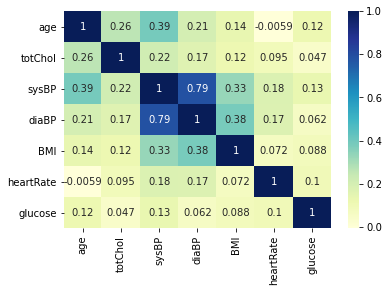

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

#상관관계
corr = df.corr()

sns.heatmap(corr,annot=True, cmap="YlGnBu")


In [47]:
#2가지로만 한 것
dfs = pd.read_csv('Desktop/heart_chart_v2.csv')
targets = dfs['TenYearCHD'].values
del dfs['TenYearCHD']
dfs = dfs.drop(['totChol','diaBP','age','heartRate','glucose','male','cigsPerDay','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes'],axis="columns")
xx_train, xx_test, yy_train, yy_test = train_test_split(dfs.values, targets,test_size=0.3, random_state=seed)
model_DTs = DecisionTreeClassifier(criterion = "entropy",max_depth=10)
model_DTs.fit(xx_train,yy_train)
pred_all = model_DTs.predict(xx_test)

import mglearn
plt.figure(figsize=[10,8])

mglearn.plots.plot_2d_classification(model_DTs,xx_train,fill=True,eps=0.5,alpha=0.4)
mglearn.discrete_scatter(xx_train[:,0],xx_train[:,1],yy_train)

plt.xlabel("age")
plt.ylabel("cancer")
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'figure'

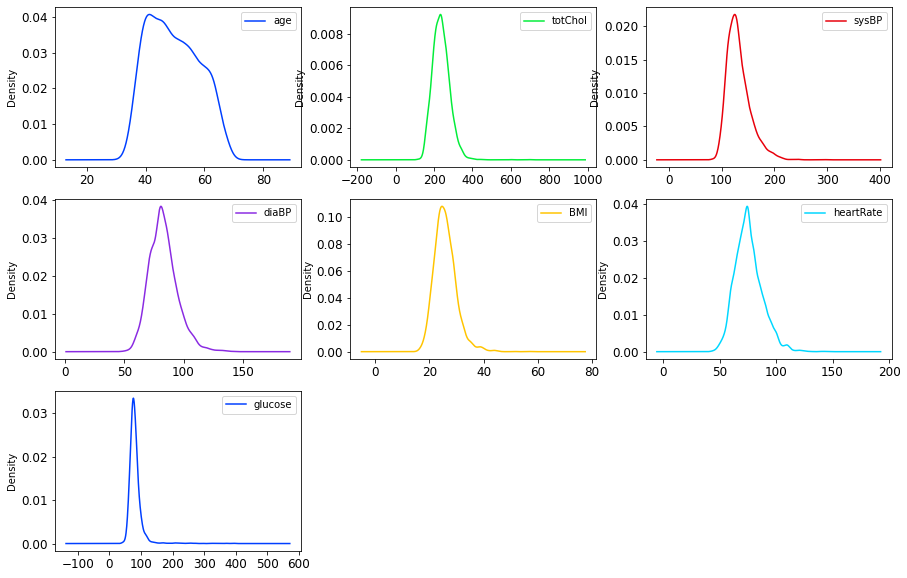

In [170]:
plt = df.plot(kind='density',subplots=True,layout=(3,3),sharex=False,sharey=False,fontsize=12,figsize=(15,10))

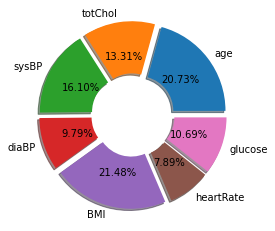

In [276]:
plt.figure()
ratio = model_DT.feature_importances_
label = df.columns.tolist()
explode = [0.08,0.08,0.08,0.08,0.08,0.08,0.08]
wedgeprops={'width':0.6}
plt.pie(ratio, labels=label, autopct='%.2f%%',explode=explode,shadow=True, wedgeprops=wedgeprops)
plt.show()

In [214]:
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import display

In [215]:
dot_data = export_graphviz(model_DT, out_file="dots.dot", feature_names=df.columns.tolist(), class_names=["Non-Cancer","Cancer"], filled=True, rounded=True,impurity=False, special_characters=True)

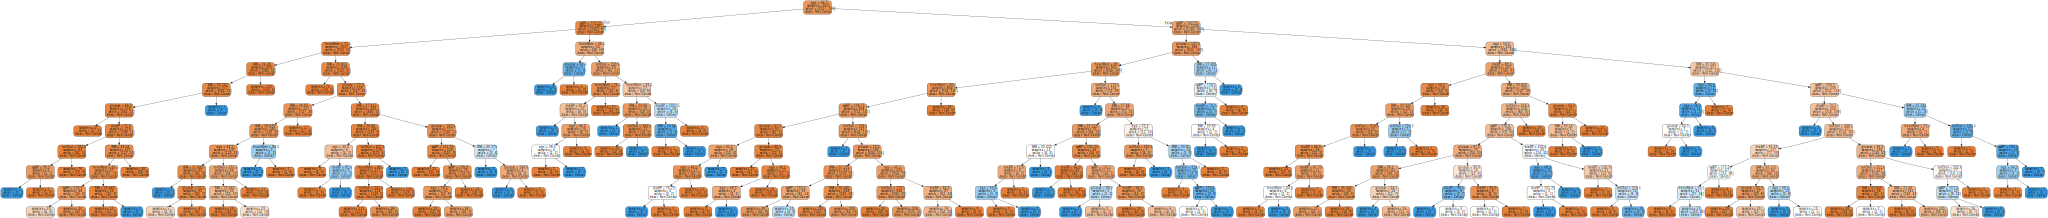

In [216]:
with open("dots.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))